## **DATASET-IONOSPHERE**


SHARANYA JORRIGALA 20BCI7092


UPPALA LIKITHA 20BCI7048

## **LOGISTIC REGRESSION**

In [948]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation, Dense
from google.colab import drive

drive.mount('/content/drive')
df =pd.read_csv('/content/drive/My Drive/Colab Notebooks/ionosphere.csv')
df.columns=['a1','a2','a3','a4','a5','a6','a7','a8','a9','a10','a11','a12','a13','a14','a15','a16','a17','a18','a19','a20','a21','a22','a23','a24','a25','a26','a27','a28','a29','a30','a31','a32','a33','a34','a35']
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a26,a27,a28,a29,a30,a31,a32,a33,a34,a35
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b


In [949]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a1      350 non-null    int64  
 1   a2      350 non-null    int64  
 2   a3      350 non-null    float64
 3   a4      350 non-null    float64
 4   a5      350 non-null    float64
 5   a6      350 non-null    float64
 6   a7      350 non-null    float64
 7   a8      350 non-null    float64
 8   a9      350 non-null    float64
 9   a10     350 non-null    float64
 10  a11     350 non-null    float64
 11  a12     350 non-null    float64
 12  a13     350 non-null    float64
 13  a14     350 non-null    float64
 14  a15     350 non-null    float64
 15  a16     350 non-null    float64
 16  a17     350 non-null    float64
 17  a18     350 non-null    float64
 18  a19     350 non-null    float64
 19  a20     350 non-null    float64
 20  a21     350 non-null    float64
 21  a22     350 non-null    float64
 22  a2

In [950]:
categories={"g":1,"b":0}
df['a35']=df['a35'].map(categories)

In [951]:
df

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a26,a27,a28,a29,a30,a31,a32,a33,a34,a35
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1
346,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,1
347,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1
348,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1


In [952]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a1      350 non-null    int64  
 1   a2      350 non-null    int64  
 2   a3      350 non-null    float64
 3   a4      350 non-null    float64
 4   a5      350 non-null    float64
 5   a6      350 non-null    float64
 6   a7      350 non-null    float64
 7   a8      350 non-null    float64
 8   a9      350 non-null    float64
 9   a10     350 non-null    float64
 10  a11     350 non-null    float64
 11  a12     350 non-null    float64
 12  a13     350 non-null    float64
 13  a14     350 non-null    float64
 14  a15     350 non-null    float64
 15  a16     350 non-null    float64
 16  a17     350 non-null    float64
 17  a18     350 non-null    float64
 18  a19     350 non-null    float64
 19  a20     350 non-null    float64
 20  a21     350 non-null    float64
 21  a22     350 non-null    float64
 22  a2

In [953]:
df.isnull().sum()

a1     0
a2     0
a3     0
a4     0
a5     0
a6     0
a7     0
a8     0
a9     0
a10    0
a11    0
a12    0
a13    0
a14    0
a15    0
a16    0
a17    0
a18    0
a19    0
a20    0
a21    0
a22    0
a23    0
a24    0
a25    0
a26    0
a27    0
a28    0
a29    0
a30    0
a31    0
a32    0
a33    0
a34    0
a35    0
dtype: int64

In [954]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [955]:
df

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a26,a27,a28,a29,a30,a31,a32,a33,a34,a35
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1
346,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,1
347,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1
348,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1


In [956]:
X=df.drop(["a35"],axis=1)
X

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a25,a26,a27,a28,a29,a30,a31,a32,a33,a34
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,0.03513,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
346,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
347,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
348,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [957]:
y=df[["a35"]]
y

,a35
0,0
1,1
2,0
3,1
4,0
...,...
345,1
346,1
347,1
348,1


In [958]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [959]:
m=LogisticRegression(random_state = 0, C=1, penalty='l2', solver='lbfgs')
#m=LogisticRegression('random_state = 1, solver='lbfgs', penalty='l2')
m.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, random_state=0)

In [960]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [961]:
y_act=m.predict(X_train)
y_pre=m.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [962]:
Y0=accuracy_score(y_act,y_train)
Y0

0.6464285714285715

In [963]:
Y1 = accuracy_score(y_pre,y_test)
Y1

0.6714285714285714

In [964]:
 precision_score(y_pre,y_test)


0.5

In [965]:
cm1=confusion_matrix(y_test,y_pre)

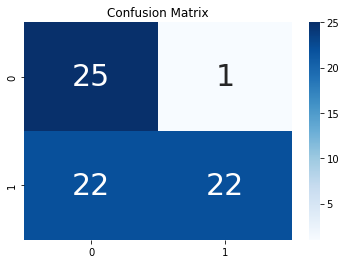

In [966]:
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
ax = plt.axes()
df_cm1 = cm1
sns.heatmap(df_cm1, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

## **SVM**

In [967]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [968]:
X=df.drop(["a1"],axis=1)

In [969]:
y=df[["a1"]]

In [970]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

In [971]:
from sklearn import svm
model=svm.SVC()

In [972]:
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [973]:
y_tr_pred=model.predict(X_train)
y_te_pred=model.predict(X_test)
Y2=accuracy_score(y_train,y_tr_pred)
Y2

0.9857142857142858

In [974]:
precision_score(y_train,y_tr_pred)

0.9841269841269841

In [975]:
cm2=confusion_matrix(y_test,y_te_pred)

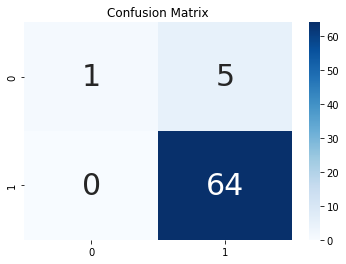

In [976]:
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
ax = plt.axes()
df_cm2 = cm2
sns.heatmap(df_cm2, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

## **KNN**

In [977]:
import pandas as pd
import math
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn import preprocessing 
from collections import Counter
from google.colab import drive
drive.mount('/content/drive')
df =pd.read_csv('/content/drive/My Drive/Colab Notebooks/ionosphere.csv')
df.columns=['a1','a2','a3','a4','a5','a6','a7','a8','a9','a10','a11','a12','a13','a14','a15','a16','a17','a18','a19','a20','a21','a22','a23','a24','a25','a26','a27','a28','a29','a30','a31','a32','a33','a34','a35']
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a26,a27,a28,a29,a30,a31,a32,a33,a34,a35
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b


In [978]:
pre = preprocessing.LabelEncoder()
df['a35']=pre.fit_transform(df['a35'])
x=df.drop(['a1','a35'],axis=1)
y=df['a1']
print(x.shape)
print(y.shape)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)
print(x_train.shape)
print(y_train.shape)

(350, 33)
(350,)
(245, 33)
(245,)


In [979]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
Y3=model.score(x_train,y_train)
Y3

0.44339992166079123

In [980]:
model.score(x_test,y_test)

0.0417777777777778

In [981]:
f={'a2':[0],'a3':[0.12345],'a4':[0.23457],'a5':[0.55661],'a6':[0.86532],'a7':[0.52566],'a8':[0.08753],'a9':[0.51549],'a10':[0.65215],'a11':[0.86454],'a12':[0.21898],'a13':[0.54128],'a14':[0.64387],'a15':[0.18478],'a16':[0.46952],'a17':[0.98485],'a18':[0.46453],'a19':[0.76978],'a20':[0.84544],'a21':[0.46582],'a22':[0.74987],'a23':[0.95777],'a24':[0.97524],'a25':[0.54545],'a26':[0.58851],'a27':[0.98721],'a28':[0.98415],'a29':[0.65782],'a30':[0.48444],'a31':[0.12345],'a32':[0.98765],'a33':[0.54378],'a34':[0.23265]}
p=pd.DataFrame(data=f)
p

,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,...,a25,a26,a27,a28,a29,a30,a31,a32,a33,a34
0,0,0.12345,0.23457,0.55661,0.86532,0.52566,0.08753,0.51549,0.65215,0.86454,...,0.54545,0.58851,0.98721,0.98415,0.65782,0.48444,0.12345,0.98765,0.54378,0.23265


In [982]:
m=model.predict(p)
print("Predicted a1 : ",m[0])
print("Actual a1 : ",0.9)

Predicted a1 :  1.0
Actual a1 :  0.9


## **RANDOM_FOREST**

In [983]:
X=df.drop(["a35"],axis=1)
y=df[["a35"]]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
model4=RandomForestClassifier(n_estimators=100)
model4.fit(X_train,y_train)
ypred4 = model4.predict(X_test)
print(metrics.classification_report(ypred4,y_test))
Y4=accuracy_score(y_test, ypred4)
Y4
print("\n\nAccuracy Score:", metrics.accuracy_score(y_test, ypred4).round(2)*100, "%")

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.98      0.99        45

    accuracy                           0.99        70
   macro avg       0.98      0.99      0.98        70
weighted avg       0.99      0.99      0.99        70



Accuracy Score: 99.0 %


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


## **NEURAL_NETWORK**

In [984]:
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns != 'MEDV']
y = df.loc[:, df.columns == 'MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [985]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [986]:
from keras.models import Sequential
from keras.layers import Activation, Dense
model = Sequential()
model.add(Dense(25, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [987]:
def create_dataset(n_train, n_test, noise=0.1):
	# generate samples
	n_samples = n_train + n_test
	X, y = make_circles(n_samples=n_samples, noise=noise, random_state=1)
	# split into train and test
	trainX, testX = X[:n_train, :], X[n_train:, :]
	trainy, testy = y[:n_train], y[n_train:]
	# return samples
	return trainX, trainy, testX, testy

In [988]:
from sklearn.datasets import make_circles
trainX, trainy, testX, testy = create_dataset(500, 500)

In [989]:
history = model.fit(trainX, trainy, epochs=500, verbose=0)

In [990]:
import numpy as np
from sklearn import metrics
y_pred = model.predict(testX)
print('Mean squared error on test data: ', metrics.mean_squared_error(testy,y_pred))
print('Least Squared error on test data: ', metrics.mean_squared_error(testy,y_pred)*2)
rmse=np.sqrt(metrics.mean_squared_error(testy, y_pred))
print('Root Mean Square error on test data: ', rmse)
print('R2 score of test data: ',metrics.r2_score(testy,y_pred))


Mean squared error on test data:  0.11622997811930098
Least Squared error on test data:  0.23245995623860197
Root Mean Square error on test data:  0.3409251796498771
R2 score of test data:  0.5350503307439637


In [991]:
_, train_acc= model.evaluate(trainX,trainy,verbose=0)

In [999]:
Y5=nn_accuracy=(train_acc)

In [1000]:
print(nn_accuracy)

0.8460000157356262


## **Accuracy comparision graph**

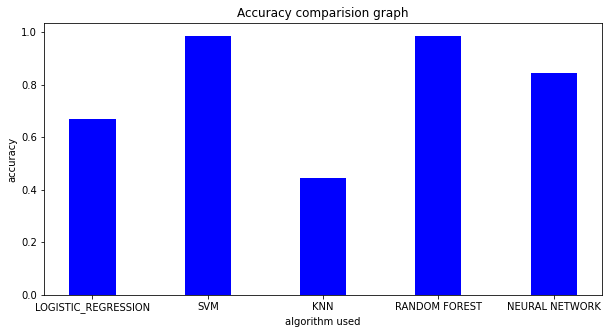

In [1002]:
import numpy as np
import matplotlib.pyplot as plt

x = ['LOGISTIC_REGRESSION','SVM','KNN','RANDOM FOREST','NEURAL NETWORK']
# corresponding y axis values
y = [Y1,Y2,Y3,Y4,Y5]

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(x, y, color ='blue',
		width = 0.4)

plt.xlabel("algorithm used")
plt.ylabel("accuracy")
plt.title("Accuracy comparision graph")
plt.show()
